# Quantum Fourier Transform

The Quantum Fourier Transform can be used to perform a linear transformation on the qubits, and is the quantum analogue of the discrete Fourier transform. The QFT has been used in multiple algorithms since its conception like the famous Shor's algorithm as well as in circuits for integer addition and multiplication.

## Complexity
The QFT can be efficiently implemented in qunatum circuits consicting of O(n^2) Hadamard gates and controlled phase shift gates, where n is the number of qubits. On the contrary the classical discrete Fourier transform requires O(n2^n) gates which is exponentially more that the QFT.

## Formula
Just like its classical counterpart the QFT acts on a quantum state |x> = Σ(x_j|j>) and maps it to a state |y> using the formula below:

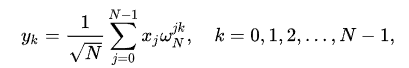

## Circuit Implementation
A Quantum Fourier Transform operation can be done using a sequence of Hadamard gates H and phase gates R. The circuit can be seen below:

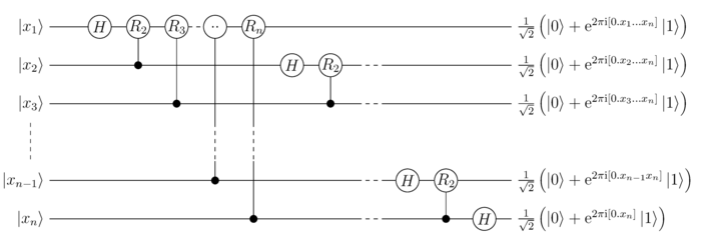




# Implementation in Qiskit

The drawing of the circuit may appear a bit unordered but if you take a close look at it you will see that the gates are correctly applied.

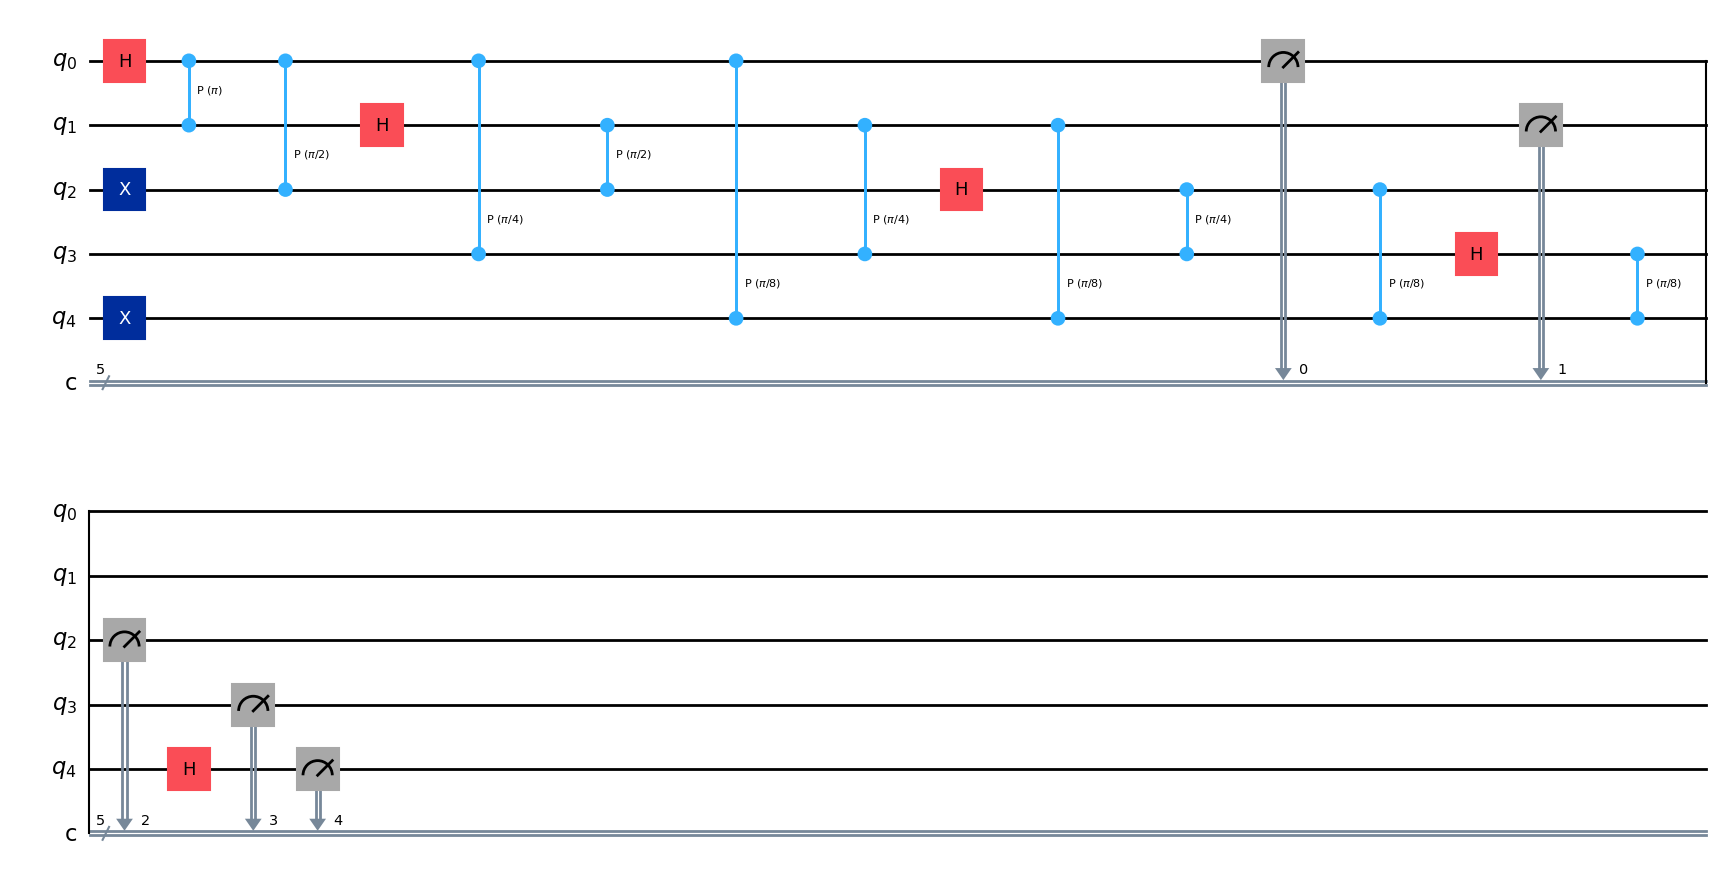

In [26]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister,transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
import random

# Define number of qubits
n = 5

# Initialize a Circuit with 4 qubits and 4 bits
qc = QuantumCircuit(n, n)

# Randomly initialize qubits with X-Pauli gates 
for i in range(n):
    if random.randint(0, 1) > 0.5:
        qc.x(i)

# Apply Hadamard and rotation gates on each qubit 
for i in range(n):
    qc.h(i)
    for k in range(i+1, n):
        qc.cp(theta=(2*np.pi/2**k), control_qubit=k, target_qubit=i)

for i in range(n):
    qc.measure(i, i)

qc.draw(output='mpl')

# Run Simulation and check the results

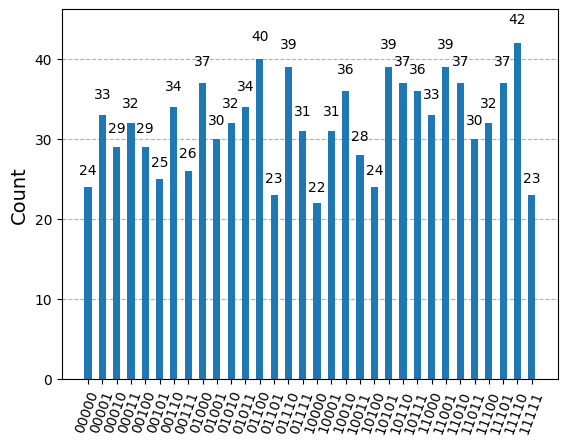

In [27]:
simulator = AerSimulator()
circ = transpile(qc, simulator)

result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts)